# Title

# Introduction

### Background
Understanding how players engage with games and related services has become an important area of research in both computer science and interactive AI systems. Modern game environments provide rich, complex worlds where players make decisions, communicate, and interact with their surroundings. These environments are increasingly used as testbeds for developing artificial intelligence systems that can understand speech, follow instructions, and act autonomously.

We want to find out the answer to the this general question: <br>
***What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?*** <br>
More specifically: <br>
**Can a player's experience level, age, and total play time be used to predict whether they subscribe to a game-related newsletter?**

The `players_data` dataset contains 196 observations and 7 variables describing player demographics, in-game behavior, and subscription status to a game-related newsletter. The data was collected by a research group in Computer Science at UBC through the PLAICraft Minecraft server, which automatically records player actions and attributes as participants navigate through the world.

Below is a summary of all variables:

| Variable | Type | Description | Example |
|-----------|------|--------------|----------|
| experience | Factor | Player's experience level in Minecraft | "Intermediate" |
| subscribe | Factor | Whether the player subscribes to a game-related newsletter | "Yes" / "No" |
| hashedEmail | Character | Hashed email address for privacy protection | "c1a5f..." |
| played_hours | Numeric | Total hours the player has spent in the game | 45.6 |
| name | Character | Player’s in-game name | "BlockMaster42" |
| gender | Factor | Player’s self-identified gender | "Male" / "Female" / "Other" |
| Age | Numeric | Player’s age in years | 23 |

We can observe that `Experience` is a character. However, it would be easier to manipulate this variable if it were an ordinal value (e.g. beginner = 1, amateur = 2, etc.). Furthermore, the formatting style of the column names are inconsistent, since `Age` is capitalized, but the rest aren't. We will be performing these changes in the data wrangling later.

# Methods & Results

- Describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
- Your report should include code which:
    - loads data 
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis
    - note: all figures should have a figure number and a legend

In [4]:
### Run this cell
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [6]:
# Reading the data
players <- read_csv("data/players.csv")

head(players)
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

## Exploratory Data Analysis and Visualization

In [7]:
# Factorize data
levels <- c("Beginner", "Amateur", "Regular", "Veteran", "Pro")

# Ordinal encoding the experience category (beginner = 1 & pro = 5)
players <- players |> 
    mutate(experience = as.numeric(factor(experience, levels=levels)), subscribe = as.factor(subscribe), gender = as.factor(gender))

colnames(players) <- c("experience", "subscribed", "hashed_email", "hours_played", "player_name", "gender", "age")

head(players)

experience,subscribed,hashed_email,hours_played,player_name,gender,age
<dbl>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
5,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
4,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
4,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
2,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
3,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
2,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


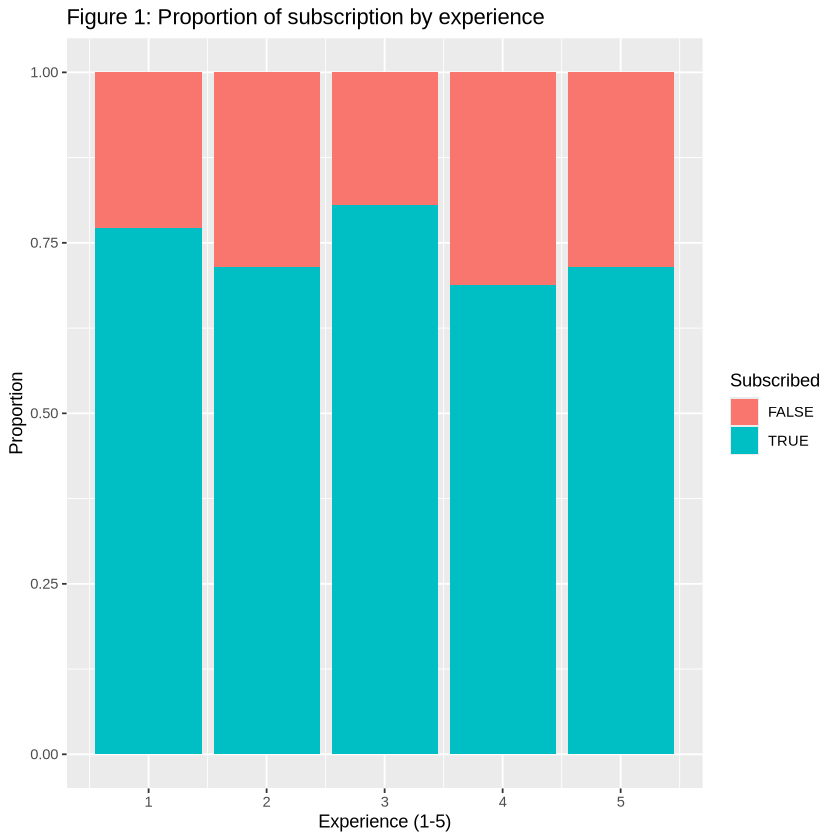

In [19]:
# Figure 1: bar chart of experience vs subscription proportion status
experience_subscribed_plot <- players |>
  ggplot(aes(x = experience, fill = subscribed)) +
  geom_bar(position = 'fill') +
  labs(
    x = "Experience (1-5)",
    y = "Proportion",
    fill = "Subscribed",
    title = "Figure 1: Proportion of subscription by experience"
  )
experience_subscribed_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


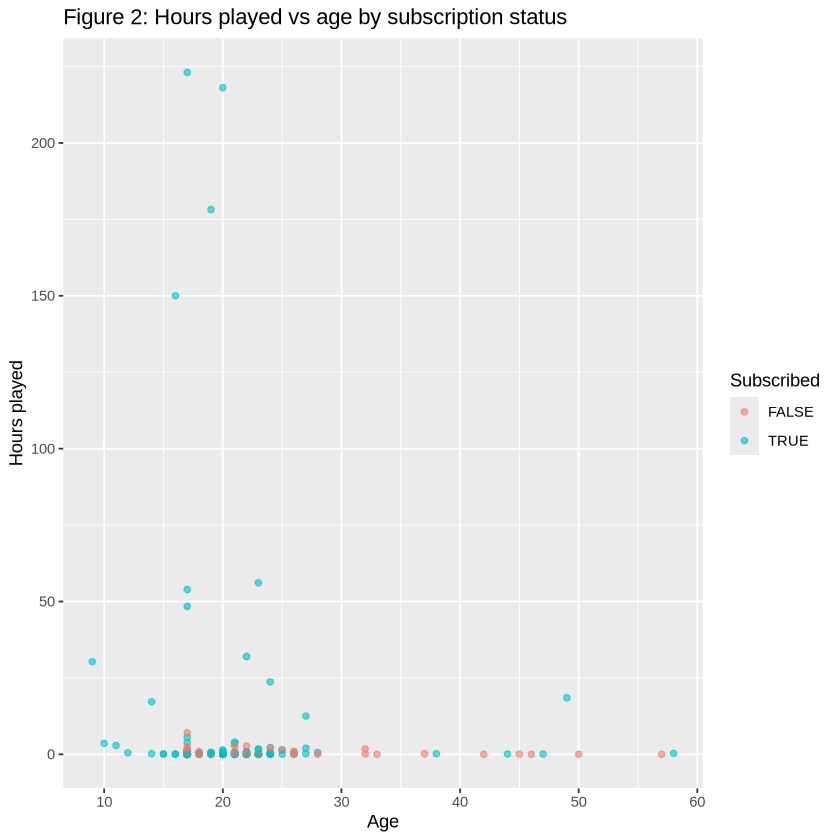

In [26]:
# Figure 2: scatter plot of age vs hours played (coloured by subscription status)
age_hours_subscribed_plot <- players |>
  ggplot(aes(x = age, y = hours_played)) +
  geom_point(aes(colour = subscribed), alpha = 0.6) +
  labs(
    x = "Age",
    y = "Hours played",
    colour = "Subscribed",
    title = "Figure 2: Hours played vs age by subscription status"
  )
age_hours_subscribed_plot

# Discussion

- Summarize what you found
- Discuss whether this is what you expected to find
- Discuss what impact could such findings have
- Discuss what future questions could this lead to

# References
(optional)